- We have:
\begin{equation*}
J(\theta) = -\frac{1}{m}y^{(i)}log(h_{\theta}(x^{(i)}))+(1-y^{(i)})log(1-h_{\theta}(x^{(i)}))
\end{equation*}
where $y^{(i)} \in \{0,1\}$, $h_{\theta}(x) = g(\theta^Tx)$ and $g(z)=\frac{1}{1+e^{-z}}$
- Calculate the first gradient of $J(\theta)$:
\begin{align*}
\nabla_{\theta} &= \frac{-1}{m}\sum_{i=1}^my^{(i)}\frac{h_{\theta}(x^{(i)})(1-h_{\theta}(x^{(i)}))}{h_{\theta}(x^{(i)})x^{(i)}} - (1-y^{(i)})\frac{h_{\theta}(x^{(i)})(1-h_{\theta}(x^{(i)}))x^{(i)}}{(1-h_{\theta}(x^{(i)}))} \\
&=  \frac{-1}{m}\sum_{i=1}^m(y^{(i)}(1-h_{\theta}(x^{(i)})) - (1-y^{(i)})h_{\theta}(x^{(i)}))x^{(i)} = \frac{-1}{m}\sum_{i=1}^m(y^{(i)}-h_{\theta}(x^{(i)}))x^{(i)}
\end{align*}
- Therefore, the Hessian H of this function is:
\begin{equation*}
\nabla^2 f(x) =  \frac{1}{m}\sum_{i=1}^mh_{\theta}(x^{(i)})(1-h_{\theta}(x^{(i)}))x^{(i)}x^{(i)}
\end{equation*}
- For any $z \in \mathbb{R}^n$:

\begin{align*}
z^T H z & = \sum_{j = 1}^{n} \sum_{k = 1}^{n} \frac{1}{m} \sum_{i = 1}^{m}  h_\theta (x^{(i)}) \big( 1 - h_\theta (x^{(i)}) \big) x_j^{(i)} x_k^{(i)} z_j z_k \\
        & = \frac{1}{m} \sum_{i = 1}^{m}  h_\theta (x^{(i)}) \big( 1 - h_\theta (x^{(i)}) \big) \sum_{j = 1}^{n} \sum_{k = 1}^{n} z_j x_j^{(i)} x_k^{(i)} z_k \\
        & = \frac{1}{m} \sum_{i = 1}^{m}  h_\theta (x^{(i)}) \big( 1 - h_\theta (x^{(i)}) \big) \big( (x^{(i)})^T z \big)^2 \\
        & \geq 0
\end{align*}

In [163]:
import numpy as np

from linear_model import LinearModel
from util import *

In [164]:
class LogisticRegression(LinearModel):
    """Logistic regression with Newton's Method as the solver."""

    def fit(self, x, y):
        """Run Newton's Method to minimize J(theta) for logistic regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
        # *** START CODE HERE ***
        
        # Init theta
        m, n = x.shape
        self.theta = np.zeros(n)

        # Newton's method
        while True:
            # Save old theta
            theta_old = np.copy(self.theta)
            
            # Compute Hessian Matrix
            h_x = 1 / (1 + np.exp(-x.dot(self.theta)))
            H = (x.T * h_x * (1 - h_x)).dot(x) / m
            gradient_J_theta = x.T.dot(h_x - y) / m

            # Updata theta
            self.theta -= np.linalg.inv(H).dot(gradient_J_theta)

            # End training
            if np.linalg.norm(self.theta-theta_old, ord=1) < self.eps:
                break

        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        
        #return 1 / (1 + np.exp(-x.dot(self.theta)))
        return x @ self.theta >= 0

        # *** END CODE HERE ***

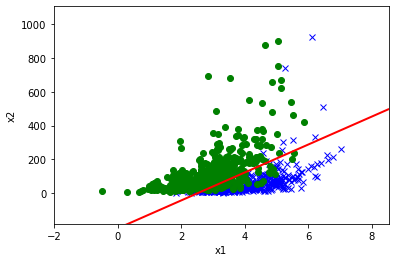

In [165]:
train_path = "/Users/tranlehai/Desktop/cs229/solution_problem_sets/PS01/data/ds1_train.csv"
valid_path = "/Users/tranlehai/Desktop/cs229/solution_problem_sets/PS01/data/ds1_valid.csv"

x_train, y_train = load_dataset(train_path, add_intercept=True)
x_eval, y_eval = load_dataset(valid_path, add_intercept=True)

# Train logistic regression
model = LogisticRegression(eps=1e-5)
model.fit(x_train, y_train)

# Plot data and decision boundary
plot(x_train, y_train, model.theta, "Problem_1b(1)")


Theta is:  [-6.26018491  2.47707251 -0.0299125 ]
The accuracy on training set is:  0.8825


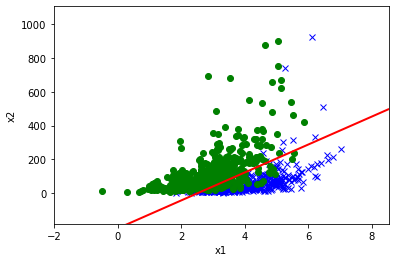

In [166]:
plot(x_train, y_train, theta=model.theta, save_path = "Problem_1b(2)")
print("Theta is: ", model.theta)
print("The accuracy on training set is: ", np.mean(model.predict(x_train) == y_train))

The accuracy on validation set is:  0.9


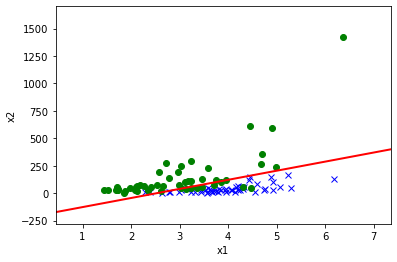

In [167]:
plot(x_eval, y_eval, model.theta, "Problem_1b(3)")
print("The accuracy on validation set is: ", np.mean(model.predict(x_eval) == y_eval))

Problem 1c
\begin{align*}
P(y=1|x;\theta,\mu_0,\mu_1,\Sigma) &= \frac{P(x|y=1)P(y=1)}{P(x|y=0)P(y=0)+P(x|y=1)P(y=1)} \\
&= \frac{\theta exp(-\frac{1}{2}(x-\mu_0)^T\Sigma^{-1}(x-\mu_0))}{(1-\theta)exp(-\frac{1}{2}(x-\mu_0)^T\Sigma^{-1}(x-\mu_0)) + \theta exp(-\frac{1}{2}(x-\mu_1)^T\Sigma^{-1}(x-\mu_1))} \\
&= \frac{1}{1+ (\frac{1-\theta}{\theta})exp(\frac{-1}{2}(x-\mu_0)^T\Sigma^{-1}(x-\mu_0) + \frac{1}{2}(x-\mu_1)^T\Sigma^{-1}(x-\mu_1))} \\
&= \frac{1}{1 + exp((\mu_0 - \mu_1)^T\Sigma^{-1}x - \frac{1}{2}\mu_0^T\Sigma^{-1}\mu_0 + \frac{1}{2}\mu_1^T\Sigma^{-1}\mu_1 + log(\frac{1-\theta}{\theta}))}
\end{align*}
Let $\theta = (\mu_1 - \mu_0)\Sigma^{-1}$, $\theta_0 = \frac{1}{2}\mu_0^T\Sigma^{-1}\mu_0 - \frac{1}{2}\mu_1^T\Sigma^{-1}\mu_1 - log(\frac{1-\theta}{\theta})$
\begin{equation*}
P(y=1|x;\theta,\mu_0,\mu_1,\Sigma) = \frac{1}{1 + exp(-(\theta^Tx + \theta_0))}
\end{equation*}

Problem 1d.
\begin{align*}
\ell(\theta, \mu_0, \mu_1, \Sigma) &= \log\prod_{i=1}^mp(x^{(i)},y^{(i)};\phi,\theta,\mu_0,\mu_1,\Sigma) \\
&= \log\prod_{i=1}^mp(x^{(i)}|y^{(i)};\theta,\mu_0,\mu_1,\Sigma)p(y^{(i)};\phi) \\
&= \log\prod_{i=1}^m\left(p(x^{(i)}|y^{(i)}=1;\theta,\mu_0,\mu_1,\Sigma)p(y^{(i)}=1;\phi)\right)^{1\{y^{(i)}=1\}}\left(p(x^{(i)}|y^{(i)}=0;\theta,\mu_0,\mu_1,\Sigma)p(y^{(i)}=0;\phi)\right)^{1\{y^{(i)}=0\}} \\
&= -\sum_{i=1}^{m}(1/2)\log|\Sigma| + \sum_{i=1}^m1\{y^{(i)}=1\}\left(\frac{-1}{2}(x^{(i)}-\mu_1)^T\Sigma^{-1}(x^{(i)}-\mu_1)+\log(\phi)\right)+\sum_{i=1}^m1\{y^{(i)}=0\}\left(\frac{-1}{2}(x^{(i)}-\mu_0)^T\Sigma^{-1}(x^{(i)}-\mu_0)+\log(\phi)\right)
\end{align*}

- Let take the partial of $\ell$ with $\phi$ and let it equal to zero, we have:
\begin{align*}
\frac{\partial}{\partial \phi}\ell(\theta, \mu_0, \mu_1, \Sigma) &= \sum_{i=1}^m1\{y^{(i)}=1\}\frac{1}{\phi}-\sum_{i=0}^m\{y^{(i)}=1\}\frac{1}{1-\phi} \\
&= \sum_{i=1}^m1\{y^{(i)}=1\}\frac{1}{\phi}-(m-\sum_{i=1}^m\{y^{(i)}=1\})\frac{1}{1-\phi} \\
&= -m\frac{1}{1-\phi}+\sum_{i=1}^m1\{y^{(i)}=1\}\left(\frac{1}{\phi}-\frac{1}{1-\phi}\right) = 0\\
\Rightarrow \phi &= \frac{1}{m}\sum_{i=1}^m1\{y^{(i)}=1\}\
\end{align*}
- Let take the partial of $\ell$ with $\mu_0$ and let it equal to zero, we have:
\begin{align*}
\frac{\partial}{\partial \mu_0}\ell(\theta, \mu_0, \mu_1, \Sigma) &= \sum_{i=1}^m1\{y^{(i)}=0\}\Sigma^{-1}(x^{(i)}-\mu_0) \\
&= \sum_{i=1}^m1\{y^{(i)}=0\}\Sigma^{-1}x^{(i)}-\sum_{i=1}^m1\{y^{(i)}=0\}\Sigma^{-1}\mu_0 = 0 \\
\Rightarrow \mu_0 &= \frac{\sum_{i=1}^m1\{y^{(i)}=0\}x^{(i)}}{\sum_{i=1}^m1\{y^{(i)}=0\}}
\end{align*}
- Let take the partial of $\ell$ with $\mu_1$ and let it equal to zero, we have:
\begin{align*}
\frac{\partial}{\partial \mu_1}\ell(\theta, \mu_0, \mu_1, \Sigma) &= \sum_{i=1}^m1\{y^{(i)}=1\}\Sigma^{-1}(x^{(i)}-\mu_1) \\
&= \sum_{i=1}^m1\{y^{(i)}=1\}\Sigma^{-1}x^{(i)}-\sum_{i=1}^m1\{y^{(i)}=1\}\Sigma^{-1}\mu_1 = 0 \\
\Rightarrow \mu_1 &= \frac{\sum_{i=1}^m1\{y^{(i)}=1\}x^{(i)}}{\sum_{i=1}^m1\{y^{(i)}=1\}}
\end{align*}
- Let take the partial of $\ell$ with $\Sigma$ and let it equal to zero, we have:
\begin{align*}
\frac{\partial}{\partial \Sigma}\ell(\theta, \mu_0, \mu_1, \Sigma) &= -\frac{m}{2\Sigma} + \frac{1}{2}\sum_{i=1}^m\Sigma^{-2}(x^{(i)}-\mu_{y^{(i)}})(x^{(i)}-\mu_{y^{(i)}})^T = 0  \\
\Rightarrow \Sigma &= \frac{1}{m}(x^{(i)}-\mu_{y^{(i)}})(x^{(i)}-\mu_{y^{(i)}})^T
\end{align*}

In [202]:
import numpy as np
import util

from linear_model import LinearModel

class GDA(LinearModel):
    """Gaussian Discriminant Analysis.

    Example usage:
        > clf = GDA()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Fit a GDA model to training set given by x and y.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).

        Returns:
            theta: GDA model parameters.
        """
        m, n = x.shape
        print(m,n)
        
        #Calculate \phi
        phi = np.sum(y)/m

        #Calculate \mu_1 and \mu_2
        mu1 = np.dot(x.T,y) / np.sum(y)
        mu0 = np.dot(x.T,(1-y)) / np.sum(1-y)
        
        #Calculate \Sigma and \Theta
        y_reshaped = np.reshape(y,(m,-1))

        mu_x = y_reshaped * mu1 + (1 - y_reshaped) * mu0

        x_centered = x - mu_x

        sigma = np.dot(x_centered.T, x_centered) / m

        sigma_inv = np.linalg.inv(sigma)

        theta = np.dot(sigma_inv, mu1 - mu0)
        theta_0 = 1/2 * mu0 @ sigma_inv @ mu0 - 1/2 * mu1 @ sigma_inv @ mu1 - np.log((1 - phi) / phi)

        self.theta = np.insert(theta, 0, theta_0)

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        # *** END CODE HERE
        return util.add_intercept(x) @ self.theta >= 0

In [194]:
def plot(x, y, theta1 = None, legend1 = None, theta2 = None, legend2 = None, correction=1.0):
    """Plot dataset and fitted logistic regression parameters.

    Args:
        x: Matrix of training examples, one per row.
        y: Vector of labels in {0, 1}.
        theta: Vector of parameters for logistic regression model.
        save_path: Path to save the plot.
        correction: Correction factor to apply (Problem 2(e) only).
    """
    # Plot dataset
    plt.figure()
    plt.plot(x[y == 1, -2], x[y == 1, -1], 'bx', linewidth=2)
    plt.plot(x[y == 0, -2], x[y == 0, -1], 'go', linewidth=2)

    # Plot decision boundary (found by solving for theta^T x = 0)
    margin1 = (max(x[:, -2]) - min(x[:, -2]))*0.2
    margin2 = (max(x[:, -1]) - min(x[:, -1]))*0.2
    x1 = np.arange(min(x[:, -2])-margin1, max(x[:, -2])+margin1, 0.01)
    x2 = -(theta1[0] / theta1[2] * correction + theta1[1] / theta1[2] * x1)
    plt.plot(x1, x2, c='black', label=legend1, linewidth=2)
    plt.xlim(x[:, -2].min()-margin1, x[:, -2].max()+margin1)
    plt.ylim(x[:, -1].min()-margin2, x[:, -1].max()+margin2)

    x1 = np.arange(min(x[:, -2]), max(x[:, -2]), 0.01)
    x2 = -(theta2[0] / theta1[2] * correction + theta2[1] / theta2[2] * x1)
    plt.plot(x1, x2, c='blue', label=legend2, linewidth=2)

    # Add labels
    plt.xlabel('x1')
    plt.ylabel('x2')

    if legend1 is not None or legend2 is not None:
        plt.legend(loc="upper left")

800 2


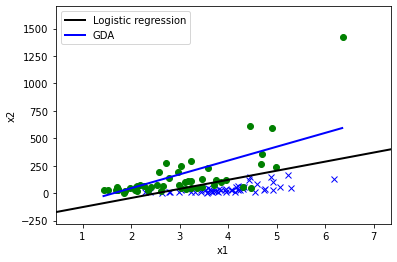

In [200]:
train_path = "/Users/tranlehai/Desktop/cs229/solution_problem_sets/PS01/data/ds1_train.csv"
valid_path = "/Users/tranlehai/Desktop/cs229/solution_problem_sets/PS01/data/ds1_valid.csv"

x_train, y_train = load_dataset(train_path, add_intercept=False)
x_eval, y_eval = load_dataset(valid_path, add_intercept=False)

GDA = GDA()
GDA.fit(x_train, y_train)


# Plot data and decision boundary
plot(x_eval, y_eval, theta1 = model.theta, legend1='Logistic regression', theta2 = GDA.theta, legend2='GDA')


800 2


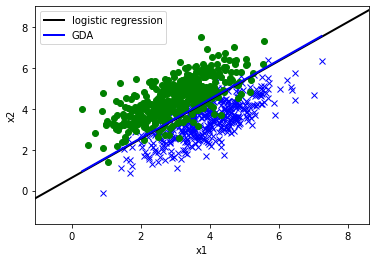

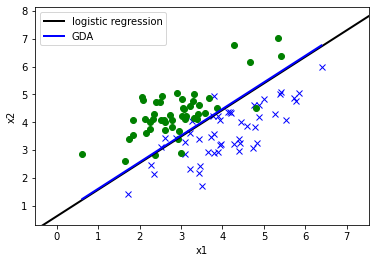

In [203]:
train_path = "/Users/tranlehai/Desktop/cs229/solution_problem_sets/PS01/data/ds2_train.csv"
valid_path = "/Users/tranlehai/Desktop/cs229/solution_problem_sets/PS01/data/ds2_valid.csv"

# Train logistic regression
x_train, y_train = util.load_dataset(train_path, add_intercept=True)
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

# Train GDA
x_train, y_train = util.load_dataset(train_path)
gda = GDA()
gda.fit(x_train, y_train)

# Plot decision boundaries on training set 2
plot(x_train, y_train, theta1=log_reg.theta, legend1='logistic regression', theta2=gda.theta, legend2='GDA')

# Plot decision boundaries on validation set 2
x_valid, y_valid = util.load_dataset(valid_path)
plot(x_valid, y_valid, theta1=log_reg.theta, legend1='logistic regression', theta2=gda.theta, legend2='GDA')